In [ ]:
!unzip /content/drive/MyDrive/BrainTumorData.zip

Archive:  /content/drive/MyDrive/BrainTumorData.zip
   creating: BrainTumorData/Brain Tumor Data Set/
   creating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y0.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y1.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y10.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y100.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y1000.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y1001.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y1002.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y1003.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y1004.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y1005.jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/y1006.jpg  
  inflating: BrainTumorData/Brain Tumor Da

In [ ]:
# Importing modules and libraries

# import system libs
import os
import time
import math
import shutil
import pathlib
import itertools
import glob
from PIL import Image
import random

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D,GlobalAvgPool2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")





In [ ]:
path_Yes = '/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/*'
path_No = '/content/BrainTumorData/Brain Tumor Data Set/Healthy/*'


tumor = []
no_tumor = []
random_state = 42

for file in glob.glob(path_Yes):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    tumor.append((img, 1))

for file in glob.glob(path_No):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    no_tumor.append((img, 0))

In [ ]:
# Concatenating the two lists and shuffle the data
all_data = tumor + no_tumor
random.shuffle(all_data)

In [ ]:
# Splitting data and labels
data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

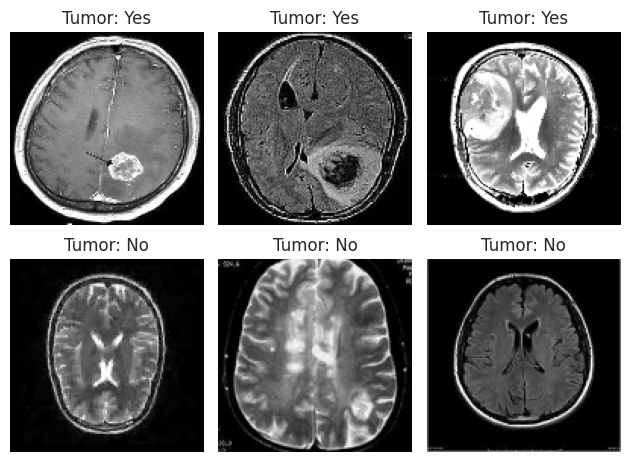

In [ ]:
# Display tumor images with label 'yes'
tumor_images = data[labels == 1]
if len(tumor_images) > 0:
    for i in range(min(3, len(tumor_images))):
        plt.subplot(2, 3, i+1)
        plt.imshow(tumor_images[i])
        plt.title("Tumor: Yes")
        plt.axis('off')
else:
    print("No tumor images found with label 'Yes'.")

# Display no_tumor images with label 'no'
no_tumor_images = data[labels == 0]
if len(no_tumor_images) > 0:
    for i in range(min(3, len(no_tumor_images))):
        plt.subplot(2, 3, i+4)
        plt.imshow(no_tumor_images[i])
        plt.title("Tumor: No")
        plt.axis('off')
else:
    print("No tumor images found with label 'No'.")

plt.tight_layout()
plt.show()



In [ ]:
# Count number of images in the respective classes 0- Brain Tumor and 1- Healthy
ROOT_DIR ="/content/BrainTumorData/Brain Tumor Data Set"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [ ]:
number_of_images.items()

dict_items([('Brain Tumor', 1500), ('Healthy', 1500)])

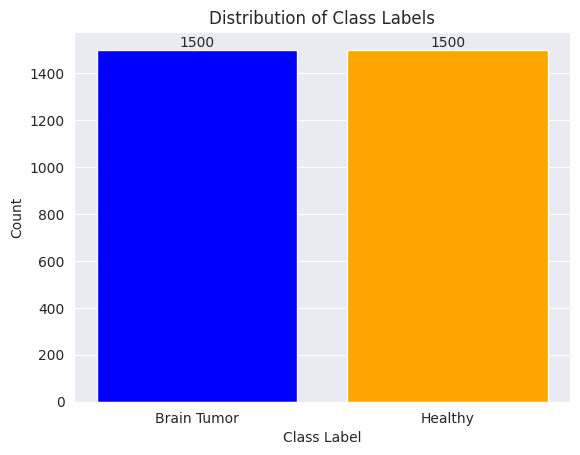

In [ ]:
# Extracting keys and values from the dictionary
labels = list(number_of_images.keys())
counts = list(number_of_images.values())

# Plotting the bar chart
plt.bar(labels, counts, color=['blue', 'orange'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')

# Adding text labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [ ]:
def dataFolder(p, split):
    # Creating a training Folder
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)

        for subdir in os.listdir(ROOT_DIR):
            os.makedirs("./"+p+"/"+ subdir)
            images = os.listdir(os.path.join(ROOT_DIR, subdir))
            num_images = len(images)
            num_samples = math.floor(split * num_images) - 5  # Select a subset of images for training

            selected_images = np.random.choice(images, size=num_samples, replace=False)

            for img in selected_images:
                original_path = os.path.join(ROOT_DIR, subdir, img)
                destination_path = os.path.join("./"+p, subdir)
                shutil.copy(original_path, destination_path)
                os.remove(original_path)
    else:
        print("The Folder already Exists")



In [ ]:
dataFolder("train",0.7)

In [ ]:
dataFolder("test",0.15)

In [ ]:
dataFolder("val",0.15)

In [ ]:
# Count number of images in the respective classes in train data
Train_DIR ="/content/train"
number_of_images={}
for dir in os.listdir(Train_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(Train_DIR,dir)))
number_of_images.items()

dict_items([('Brain Tumor', 1045), ('Healthy', 1045)])

In [ ]:
# Count number of images in the respective classes in Test data
Test_DIR ="/content/test"
number_of_images={}
for dir in os.listdir(Train_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(Test_DIR,dir)))
number_of_images.items()

dict_items([('Brain Tumor', 63), ('Healthy', 63)])

In [ ]:
# Count number of images in the respective classes in val data
Val_DIR ="/content/val"
number_of_images={}
for dir in os.listdir(Train_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(Val_DIR,dir)))
number_of_images.items()

dict_items([('Brain Tumor', 53), ('Healthy', 53)])

In [ ]:
# CNN Model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# Dense Layer
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 222, 222, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                        

In [ ]:
model.compile(optimizer='adam',loss= keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
#Train data generator
def preprocessingImages1(path):
    """
    input: path
    output: preprocessed images
    """
    # Define ImageDataGenerator with specified augmentation parameters
    image_data = ImageDataGenerator(
        zoom_range=0.2,
        shear_range=0.2,
        rescale=1/255,
        horizontal_flip=True
    )

    # Generate batches of data from the directory
    image_generator = image_data.flow_from_directory(
        directory=path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    return image_generator
#Test and validation data generator
def preprocessingImages2(path):
    """
    input: path
    output: preprocessed images
    """
    # Define ImageDataGenerator with rescaling parameter
    image_data = ImageDataGenerator(rescale=1/255)

    # Generate batches of data from the directory
    image_generator = image_data.flow_from_directory(
        directory=path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'
    )

    return image_generator

In [ ]:
path = '/content/train'
train_data = preprocessingImages1(path)

Found 2090 images belonging to 2 classes.


In [ ]:
path = '/content/test'
test_data=preprocessingImages2(path)

Found 126 images belonging to 2 classes.


In [ ]:
path = '/content/val'
val_data=preprocessingImages2(path)

Found 106 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Early stopping
es = EarlyStopping(monitor="accuracy", min_delta=0.01, patience=6, verbose=1, mode='auto')
# Model checkpoint
mc = ModelCheckpoint(filepath="./bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only=True, mode='auto')

cd = [es, mc]

In [ ]:
# Train the model using fit_generator
hs = model.fit_generator(
    generator=train_data,
    steps_per_epoch=8,  # Adjust this based on your training data size
    epochs=30,
    verbose=1,
    validation_data=val_data,
    validation_steps=16,  # Adjust this based on your validation data size
    callbacks=cd
)

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/mul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-44-b7e0b0122fa9>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2913, in fit_generator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5592, in categorical_crossentropy

Detected at node categorical_crossentropy/mul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-44-b7e0b0122fa9>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2913, in fit_generator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5592, in categorical_crossentropy

2 root error(s) found.
  (0) INVALID_ARGUMENT:  required broadcastable shapes
	 [[{{node categorical_crossentropy/mul}}]]
	 [[Func/cond/then/_25/cond/cond/then/_124/cond/cond/remove_squeezable_dimensions/cond/else/_228/input/_258/_237]]
  (1) INVALID_ARGUMENT:  required broadcastable shapes
	 [[{{node categorical_crossentropy/mul}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_82715]

In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

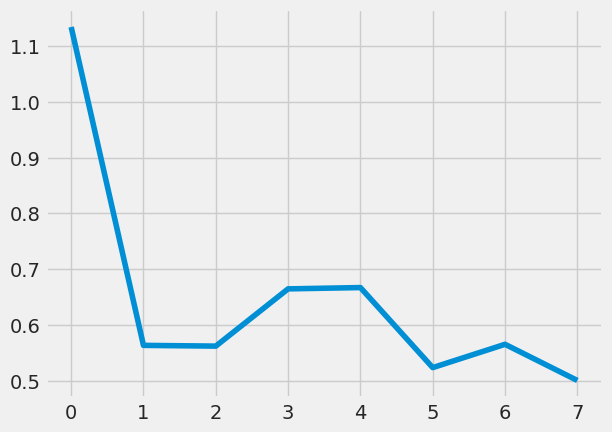

In [ ]:
plt.plot(h['loss'])
plt.show()

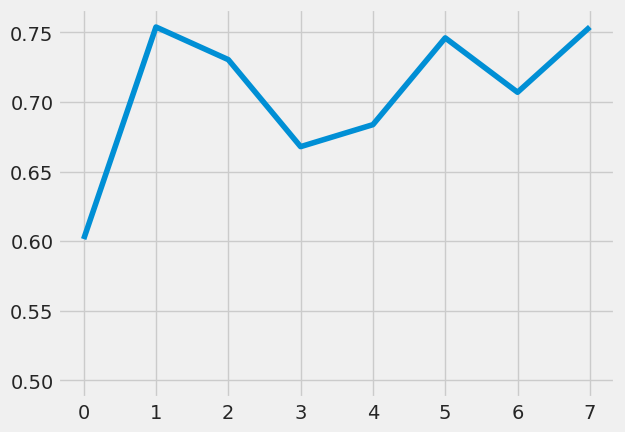

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.show()

# EfficientNet Model

In [ ]:
train_data_dir = '/content/train'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
data = pd.concat([Fseries, Lseries], axis= 1)
data
filepaths

['/content/train/Brain Tumor/y1098.jpg',
 '/content/train/Brain Tumor/y733.jpg',
 '/content/train/Brain Tumor/y1145.jpg',
 '/content/train/Brain Tumor/y311.jpg',
 '/content/train/Brain Tumor/y1285.jpg',
 '/content/train/Brain Tumor/y553.jpg',
 '/content/train/Brain Tumor/y949.jpg',
 '/content/train/Brain Tumor/y95.jpg',
 '/content/train/Brain Tumor/y231.jpg',
 '/content/train/Brain Tumor/y296.jpg',
 '/content/train/Brain Tumor/y155.jpg',
 '/content/train/Brain Tumor/y96.jpg',
 '/content/train/Brain Tumor/y1134.jpg',
 '/content/train/Brain Tumor/y441.jpg',
 '/content/train/Brain Tumor/y137.jpg',
 '/content/train/Brain Tumor/y943.jpg',
 '/content/train/Brain Tumor/y653.jpg',
 '/content/train/Brain Tumor/y400.jpg',
 '/content/train/Brain Tumor/y472.jpg',
 '/content/train/Brain Tumor/y1473.jpg',
 '/content/train/Brain Tumor/y598.jpg',
 '/content/train/Brain Tumor/y686.jpg',
 '/content/train/Brain Tumor/y264.jpg',
 '/content/train/Brain Tumor/y300.jpg',
 '/content/train/Brain Tumor/y779.jpg

In [ ]:
test_data_dir = '/content/test'
filepaths = []
labels = []
folds = os.listdir(test_data_dir)

for fold in folds:
    foldpath = os.path.join(test_data_dir,fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath,file)
        filepaths.append (fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths,name = 'filepaths')
Lseries = pd.Series(labels, name = 'labels')
dt = pd.concat([Fseries,Lseries],axis='columns')
dt

,filepaths,labels
0,/content/test/Brain Tumor/y135.jpg,Brain Tumor
1,/content/test/Brain Tumor/y1375.jpg,Brain Tumor
2,/content/test/Brain Tumor/y1071.jpg,Brain Tumor
3,/content/test/Brain Tumor/y362.jpg,Brain Tumor
4,/content/test/Brain Tumor/y1426.jpg,Brain Tumor
...,...,...
121,/content/test/Healthy/no916.jpg,Healthy
122,/content/test/Healthy/no773.jpg,Healthy
123,/content/test/Healthy/no1298.jpg,Healthy
124,/content/test/Healthy/no1015.jpg,Healthy


In [ ]:
valid_df,test_df = train_test_split(dt,train_size=0.5,shuffle=True,random_state=123)

In [ ]:
batch_size=16
img_size = (224,224)
channels = 3
img_shape=(img_size[0],img_size[1],channels)  #224*224*3
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( data,
                                       x_col= 'filepaths',
                                       y_col= 'labels',
                                       target_size= img_size,
                                       class_mode= 'categorical',
                                       color_mode= 'rgb',
                                       shuffle= True,
                                       batch_size= batch_size)
test_gen = tr_gen.flow_from_dataframe( test_df,
                                      x_col= 'filepaths',
                                      y_col= 'labels',
                                      target_size= img_size,
                                      class_mode= 'categorical',
                                      color_mode= 'rgb',
                                      shuffle= False ,
                                      batch_size= batch_size)
valid_gen = tr_gen.flow_from_dataframe( valid_df,
                                      x_col= 'filepaths',
                                      y_col= 'labels',
                                      target_size= img_size,
                                      class_mode= 'categorical',
                                      color_mode= 'rgb',
                                      shuffle= True,
                                      batch_size= batch_size)


Found 2090 validated image filenames belonging to 2 classes.
Found 63 validated image filenames belonging to 2 classes.
Found 63 validated image filenames belonging to 2 classes.


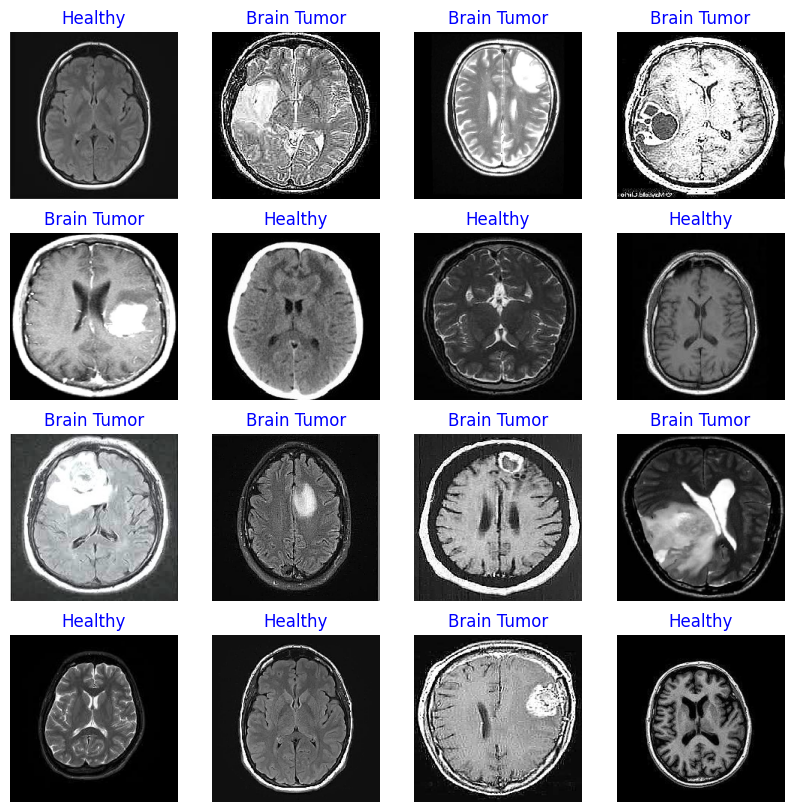

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images,labels = next(train_gen)
plt.figure(figsize = (10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i]/255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name= classes[index]
    plt.title(class_name,color='blue',fontsize=12)
    plt.axis('off')
plt.show();

In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(128, kernel_regularizer=regularizers.l2(0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dropout(rate=0.5, seed=123),
    Dense(class_count, activation='softmax')
])

model.compile(Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


43941136/43941136 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization_6 (Bat  (None, 1536)              6144      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               196736    
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)               

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Early stopping
es = EarlyStopping(monitor="accuracy", min_delta=0.01, patience=6, verbose=1, mode='auto')
# Model checkpoint
mc = ModelCheckpoint(filepath="./efficientNETMOdel.h5", monitor="accuracy", verbose=1, save_best_only=True, mode='auto')

cd = [es, mc]

In [ ]:
epochs = 5
history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= test_gen, shuffle= False,callbacks=cd)


Epoch 1/5
131/131 [==============================] - ETA: 0s - loss: 3.8490 - accuracy: 0.8938
Epoch 1: accuracy improved from -inf to 0.89378, saving model to ./efficientNETMOdel.h5
131/131 [==============================] - 100s 328ms/step - loss: 3.8490 - accuracy: 0.8938 - val_loss: 3.6089 - val_accuracy: 0.9048
Epoch 2/5
131/131 [==============================] - ETA: 0s - loss: 2.8351 - accuracy: 0.9584
Epoch 2: accuracy improved from 0.89378 to 0.95837, saving model to ./efficientNETMOdel.h5
131/131 [==============================] - 36s 275ms/step - loss: 2.8351 - accuracy: 0.9584 - val_loss: 2.5467 - val_accuracy: 0.9683
Epoch 3/5
131/131 [==============================] - ETA: 0s - loss: 2.2630 - accuracy: 0.9713
Epoch 3: accuracy improved from 0.95837 to 0.97129, saving model to ./efficientNETMOdel.h5
131/131 [==============================] - 37s 280ms/step - loss: 2.2630 - accuracy: 0.9713 - val_loss: 2.0819 - val_accuracy: 0.9841
Epoch 4/5
131/131 [=======================

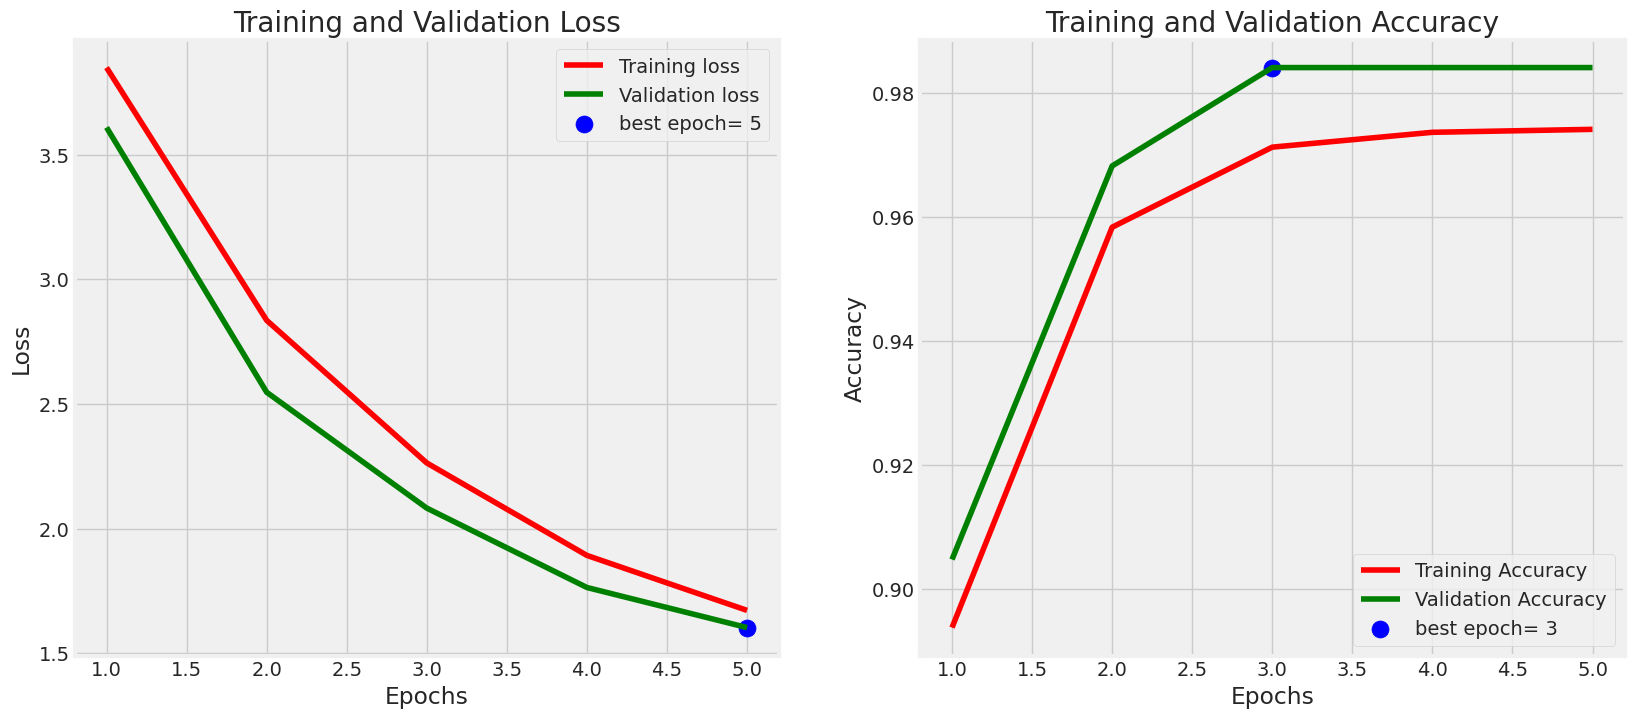

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()